In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')


In [3]:
print(train_data.shape)

(60000, 785)


In [4]:
# Separate features and labels
x_train = train_data.iloc[:, 1:].values  
y_train = train_data.iloc[:, 0].values   
x_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

In [5]:
# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
# Reshape the data
#x_train = x_train.reshape(-1, 28 * 28)
#x_test = x_test.reshape(-1, 28 * 28)

In [6]:
# Step 2: Build the model with Regularization and Dropout
model = models.Sequential([
    layers.Input(shape=(28 * 28,)),  # Input layer
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularization
    layers.Dropout(0.5),  # Dropout with 50% probability
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularization
    layers.Dropout(0.5),  # Dropout with 50% probability
    layers.Dense(10, activation='softmax')  # Output layer
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Step 4: Define Learning Rate Scheduling and Early Stopping
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)  # Reduce LR on plateau
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Early stopping

In [22]:
# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[reduce_lr, early_stopping])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9421 - loss: 0.3231 - val_accuracy: 0.9652 - val_loss: 0.2397 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9419 - loss: 0.3226 - val_accuracy: 0.9658 - val_loss: 0.2376 - learning_rate: 1.0000e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9410 - loss: 0.3243 - val_accuracy: 0.9664 - val_loss: 0.2374 - learning_rate: 1.0000e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9402 - loss: 0.3268 - val_accuracy: 0.9658 - val_loss: 0.2374 - learning_rate: 1.0000e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9417 - loss: 0.3247 - val_accuracy: 0.9668 - val_loss: 0.2352 - learning_rate: 1.0000e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9412 - loss: 0.3201 - val_accuracy: 0.9663 - val_loss: 0.2367 - learning_rate: 1.0000e-04
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/st

In [18]:
# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9608 - loss: 0.2590
Test Accuracy: 0.9661


In [19]:
# Step 7: Make predictions
predictions = model.predict(x_test[:5])
print("Predictions:", np.argmax(predictions, axis=1))
print("Actual Labels:", y_test[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Predictions: [7 2 1 0 4]
Actual Labels: [7 2 1 0 4]


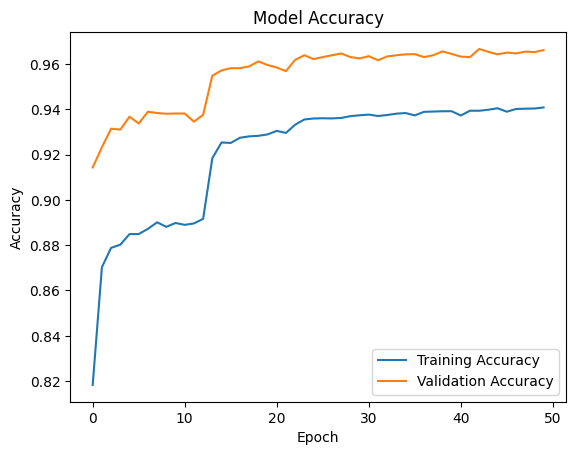

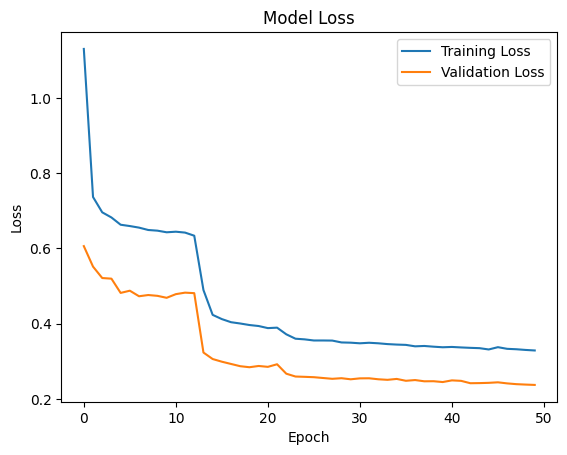

In [20]:
# Step 8: Visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()